# **LAB 2: LINEAR REGRESSION**
# Santosh Mahato Koiri (ACE079BCT059)

## 0. Imports and setup
Import all libraries used in the notebook and set plotting style.

In [49]:
import numpy as np                               # numerical operations and arrays
import pandas as pd                              # DataFrame manipulation
import matplotlib.pyplot as plt                  # plotting basic charts
import seaborn as sns                            # nicer default plotting style (optional)

from sklearn.model_selection import train_test_split   # split data into train/test
from sklearn.linear_model import LinearRegression      # linear regression model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score # evaluation metrics

# Optional imports for encoding / imputation
from sklearn.impute import SimpleImputer

sns.set(style='whitegrid', context='notebook')       # set a pleasant plotting style

# **Task 1: Simple Linear Regression (Single Feature)**

## 1. Data Retrieval and Collection


Load the California Housing dataset and put it into a pandas DataFrame for easy inspection.

In [50]:
try:
    df = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("File not found. Please upload 'housing.csv' to your notebook environment.")

In [51]:
# Rename the feature column for 'HouseAge' to match assignment naming
df = df.rename(columns={'HouseAge': 'housing_median_age'})

# Quick inspection: shape and columns
print('Shape (rows, columns):', df.shape)            # number of samples and columns
print('\nColumn names:')
print(list(df.columns))                              # list column names for reference

# Display first 5 rows to understand the data
df.head()

Shape (rows, columns): (20640, 10)

Column names:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The shape output tells us that there are 20640 rows and 10 columns.
The columns output lists out all 10 column names. 
df.head() gives first 5 data samples.

## 2. Data Cleaning

Check for missing values and data types.

In [29]:
# Check for missing values in each column
missing_counts = df.isnull().sum()                  # count missing values per column
print('Missing counts per column:\n', missing_counts)

Missing counts per column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


All columns are complete except total_bedrooms, which contains 207 missing entries; every other column (longitude, latitude, housing_median_age, total_rooms, population, households, median_income, median_house_value, ocean_proximity) has 0 missing values.

For the missing values, we can impute (e.g., median) or drop rows.

In [52]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())  # imputation
# df = df.dropna(subset=['median_house_value'])  # drop rows missing target

In [53]:
# Check for missing values in each column
missing_counts = df.isnull().sum()                  # count missing values per column
print('Missing counts per column:\n', missing_counts)

Missing counts per column:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Data cleaning revealed 207 missing entries in total_bedrooms while all other columns were complete.I impute rather than drop rows. For a simple robust solution I imputed total_bedrooms with the column median (robust to outliers) and rechecked df.isnull().sum().

In [54]:
# Data types
print('\nData types:')
print(df.dtypes)


Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object


## 3. Feature Design (Task 1: single feature)

Select the single input feature: `housing_median_age`.

### **Why this feature ?**
Intuitively, age of houses can relate to price (older neighborhoods or newer developments influence median value), though it may not be a strong predictor alone.

In [55]:
# Select single feature (X) and target (y)
feature_name = 'housing_median_age'                # assignment-specified input feature
target_name = 'median_house_value'                 # label

X = df[[feature_name]]                             # keep as DataFrame (2D) for sklearn
y = df[target_name]                                # Series (1D)

print('X shape:', X.shape)                         # (n_samples, 1)
print('y shape:', y.shape)                         # (n_samples,)

X shape: (20640, 1)
y shape: (20640,)


## 4. Algorithm selection
We choose Ordinary Least Squares Linear Regression.

### Why linear regression is appropriate for this task ?
The label median_house_value is a continuous numeric variable. Linear regression is a natural choice when the goal is to predict a continuous outcome from one or more predictors.

In [56]:
# Instantiate the Linear Regression model (ordinary least squares)
model = LinearRegression()                         # no hyperparameters required for basic OLS

## 5. Loss Function Selection
We will evaluate the model using Mean Squared Error (MSE).
### Definition:
MSE is the average of the squared differences between predicted values and the true values: $$ \text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat y_i)^2 $$ where y_i are true targets and ŷ_i are predictions.

### What it measures:
The typical squared prediction error — i.e., how far, on average, predictions are from the actual values (with larger errors penalized more because of squaring).

## 6. Model learning (training)

Split the data into train and test sets, fit the linear regression model, and print learned parameters.

In [57]:
# Split data: 80% training, 20% testing, fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the linear model on the training data
model.fit(X_train, y_train)                        # learn coefficient and intercept from training data

# Extract learned parameters
slope = model.coef_[0]                             # coef_ is an array; single feature -> first element
intercept = model.intercept_                       # scalar intercept

print(f'Fitted intercept: {intercept:.4f}')
print(f'Fitted coefficient (slope): {slope:.4f}')

Fitted intercept: 179975.0016
Fitted coefficient (slope): 951.4619


Learned intercept = 179,975.0016 <br>
The model predicts a median house value of about $179,975 when housing_median_age = 0.

Learned coefficient (slope) = 951.4619 <br>
For every one-year increase in housing_median_age, the model predicts an increase of about $951.46 in median house value, holding everything else constant (there are no other features in this simple model).

## 7. Model evaluation

We will now compute predictions on the test set and report MSE and R².

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)                      # predicted median house values for test set

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)            # average squared error
r2 = r2_score(y_test, y_pred)                       # proportion of variance explained

print(f'Test Mean Squared Error (MSE): {mse:.4f}')
print(f'Test R² score: {r2:.4f}')

Test Mean Squared Error (MSE): 12939617265.1003
Test R² score: 0.0126


**MSE**: average squared prediction error; lower is better. <br>
**R²**: fraction of variance in the target explained by the model (1 is perfect, 0 means not better than predicting the mean).
### **Observation and Conclusion**:
The single-feature linear model yields a very large MSE and an R² of only 1.3%, indicating that housing_median_age alone explains almost none of the variation in median_house_value; we should add more predictive features and run diagnostics before trusting the model.

## Visualizations

1) Scatter plot with regression line
2) Predicted vs Actual
3) Residuals distribution

d:\vscode\AI\Santosh_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


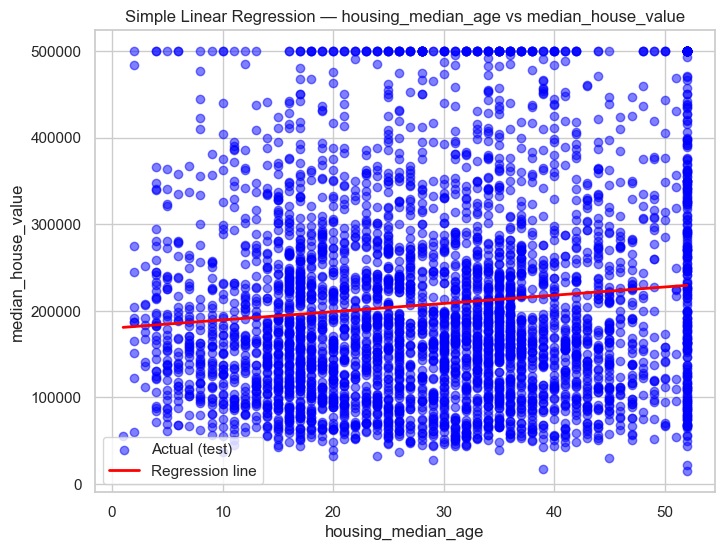

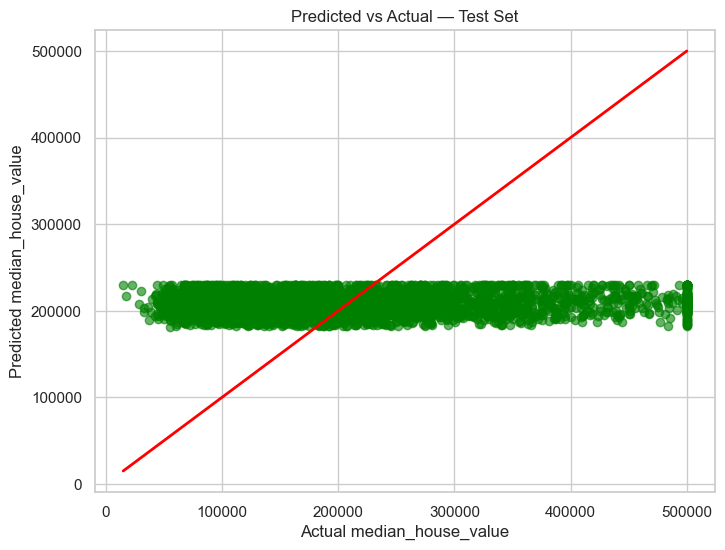


Residuals summary:
count      4128.000000
mean      -1842.819572
std      113751.289289
min     -214452.018678
25%      -85203.507996
50%      -26698.974136
75%       54799.415738
max      318123.074679
Name: median_house_value, dtype: float64


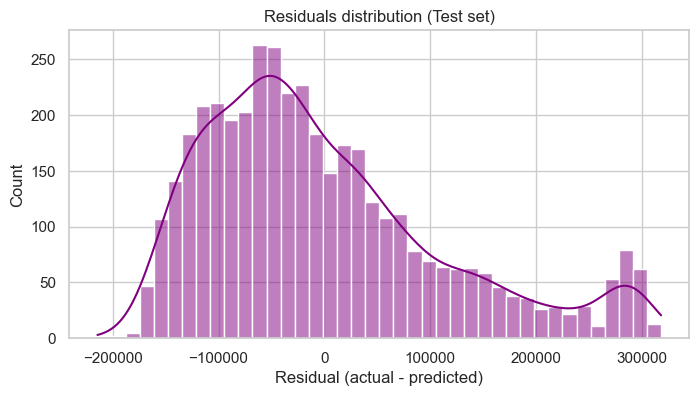

In [59]:
# 1) Scatter + regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature_name], y_test, color='blue', alpha=0.5, label='Actual (test)')  # actual test points

# Create smooth line across feature range for plotting fitted line
X_line = np.linspace(X[feature_name].min(), X[feature_name].max(), 200).reshape(-1, 1)  # sorted input values
y_line = model.predict(X_line)                      # model predictions on the smooth input
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')

plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.title('Simple Linear Regression — housing_median_age vs median_house_value')
plt.legend()
plt.show()

# 2) Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # identity line
plt.xlabel('Actual median_house_value')
plt.ylabel('Predicted median_house_value')
plt.title('Predicted vs Actual — Test Set')
plt.show()

# 3) Residuals diagnostics
residuals = y_test - y_pred                           # errors: actual - predicted
print('\nResiduals summary:')
print(pd.Series(residuals).describe())                # show descriptive statistics

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=40, color='purple')
plt.xlabel('Residual (actual - predicted)')
plt.title('Residuals distribution (Test set)')
plt.show()

# ---------------------------------------------------------
# **Task 2: Multiple Linear Regression (All Features)**


## 1 & 2. Data Retrieval and Cleaning
We reuse the cleaned dataset (df) from Task 1.
Data is loaded, missing values checked.

## 3. Feature Design (All Features)
We now prepare the feature matrix X and target y, and encode categorical features (`ocean_proximity`) using one-hot encoding. Then we scale numeric features with StandardScaler.

In [44]:
# Identify target and drop it from features
target_col = 'median_house_value'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset")

X = df.drop(columns=[target_col]).copy()            # features DataFrame
y = df[target_col].copy()                            # target Series

# Handle categorical column 'ocean_proximity'
categorical_cols = [c for c in X.columns if X[c].dtype == 'object' or X[c].dtype.name == 'category']
print('Categorical columns detected:', categorical_cols)

if len(categorical_cols) > 0:
    # Use pandas one-hot encoding for simplicity and interpretability
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # drop_first avoids collinearity with intercept
    print('\nApplied one-hot encoding to categorical columns. New shape:', X.shape)

# Now scale numeric features using StandardScaler (when features have different scales)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()   # numeric feature list
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Final feature matrix
X_final = X_scaled.copy()
print('\nFinal features shape (after encoding & scaling):', X_final.shape)
X_final.head()

Categorical columns detected: []

Final features shape (after encoding & scaling): (20640, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881


Why scaling? <br>LinearRegression does not require scaling for correctness, but scaling helps interpret coefficient magnitudes when predictors have very different units and is useful for diagnostics and comparability. We scaled here to keep features on comparable scales and to make coefficient comparisons meaningful in standardized units.<br><br>
Explain why multiple features may improve prediction performance? <br>
Adding multiple, relevant features usually improves prediction because it supplies more of the true signals that drive the target (reducing bias and increasing explained variance), but we must guard against overfitting, multicollinearity and poor data quality by using cross-validation, regularization, and careful preprocessing.”

## 4, 5 & 6. Algorithm selection, Loss & Model training

We use Ordinary Least Squares Linear Regression and evaluate with Mean Squared Error (MSE) and R². This choice is consistent with Task 1 and gives interpretable coefficients for each (standardized) feature.

In [45]:
# Model learning: split data and fit
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

model = LinearRegression()                           # ordinary least squares model
model.fit(X_train, y_train)                          # fit model on training data

print('Model trained.')
print(f'Intercept: {model.intercept_:.4f}')

# Map coefficients to feature names (note: features are standardized so coefficients refer to 1-std changes)
coef_series = pd.Series(model.coef_, index=X_final.columns).sort_values(ascending=False)
print('\nTop 10 positive coefficients (feature : coef):')
print(coef_series.head(10))
print('\nTop 10 negative coefficients (feature : coef):')
print(coef_series.tail(10))

Model trained.
Intercept: 206640.6370

Top 10 positive coefficients (feature : coef):
median_income         77013.875352
total_bedrooms        48757.372097
households            17717.714859
housing_median_age    14885.958358
total_rooms          -17862.582941
population           -43589.917358
longitude            -85413.280057
latitude             -90669.136247
dtype: float64

Top 10 negative coefficients (feature : coef):
median_income         77013.875352
total_bedrooms        48757.372097
households            17717.714859
housing_median_age    14885.958358
total_rooms          -17862.582941
population           -43589.917358
longitude            -85413.280057
latitude             -90669.136247
dtype: float64


Because we scaled numeric features (zero mean, unit variance), each coefficient represents the expected change in median_house_value for a one-standard-deviation increase in that feature, holding others constant. For one-hot encoded binary features (e.g., ocean_proximity_X), coefficients represent the expected change when that category is present vs the reference category, on the same (standardized) scale.

* Intercept = 206,640.6370
    * When every (standardized) feature is zero — i.e., a hypothetical “average” house (all numeric features at their mean, categorical features at reference level) — the model predicts a median house value of about $206,640. This is a baseline prediction.
* Coefficients (what they mean)
    * Each coefficient is the expected change in median_house_value (in dollars) for a one‑standard‑deviation increase in the corresponding predictor, holding other predictors constant (because numeric features were standardized before fitting).
    * For example:
        * median_income: +77,013 → a one‑std increase in median_income is associated with ≈+$77k in predicted median house value (largest positive effect).
        * total_bedrooms: +48,757 → one‑std increase in bedrooms → ≈+$49k.
        * households: +17,718 → one‑std increase in households → ≈+$17.7k.
        * housing_median_age: +14,885 → one‑std increase in age → ≈+$14.9k.
        * total_rooms: −17,863 → one‑std increase in total_rooms → ≈−$17.9k (negative sign).
        * population: −43,590
        * longitude: −85,413
        * latitude: −90,669
    * → these location/population-related coefficients are large and negative, indicating those standardized directions are associated with lower predicted values.

## 7. Model evaluation

We evaluate on the test set (MSE, RMSE, R²) and present diagnostic plots.

In [46]:
# Predictions on test set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test R²: {r2:.4f}')

# Residuals
residuals = y_test - y_pred
print('\nResiduals summary:')
print(pd.Series(residuals).describe())

Test MSE: 5059928371.1654
Test RMSE: 71133.1735
Test R²: 0.6139

Residuals summary:
count      4128.000000
mean       1075.899385
std       71133.652978
min     -317132.979531
25%      -43549.072217
50%      -10205.646333
75%       32663.068698
max      439713.482222
Name: median_house_value, dtype: float64


### Observation:
Overall fit<br>
R² = 0.6139 → the model explains about 61.4% of the variance in median_house_value. This is a substantial improvement over the single-feature model (R² ≈ 0.01) and indicates the multi‑feature model captures most of the systematic signal in the data.<br><br>
Error scale<br>
Test MSE = 5,059,928,371.1654 (squared dollars) and RMSE ≈ 71,133.17 dollars.<br>
RMSE is the more interpretable number: on average the model’s predictions are off by about $71k. Put in context (typical house prices in this dataset ~ $200k–$450k), this is a moderate error (roughly 15–35% of many target values).<br><br>
Residuals / bias<br>
Residuals mean ≈ 1,075.9 — very close to zero, so there is little systematic bias (predictions are not consistently too high or too low).<br>
Residuals std ≈ 71,133, which matches RMSE (as expected) and confirms the typical spread of errors.<br>
Quartiles: 25% = −43,549; 50% = −10,206; 75% = +32,663 — residuals are somewhat skewed (median negative), but the central spread is reasonable.<br>
Min/Max (≈ −317k to +440k) show the presence of large outliers where the model makes very large errors.

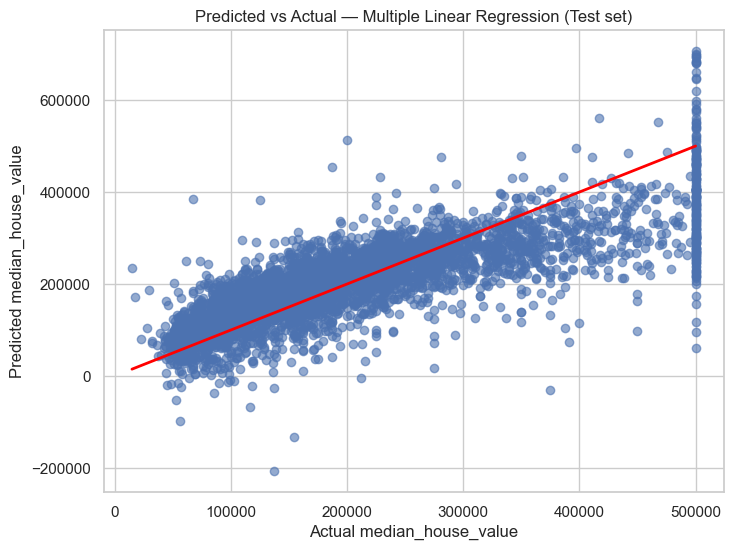

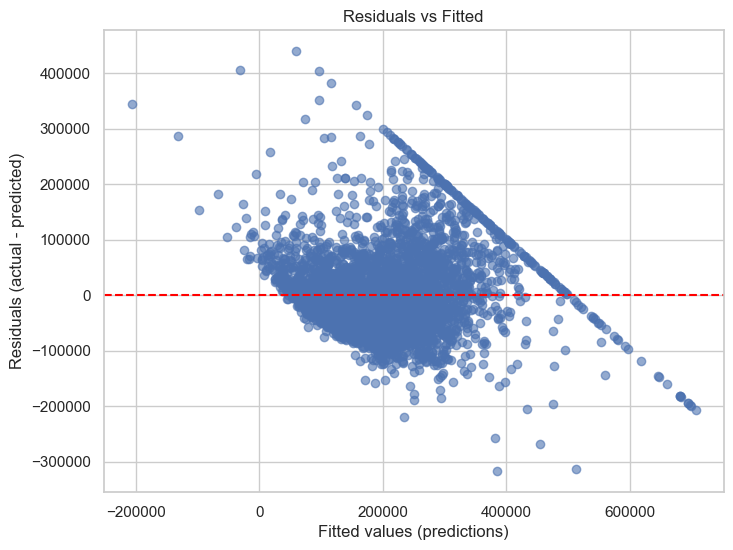

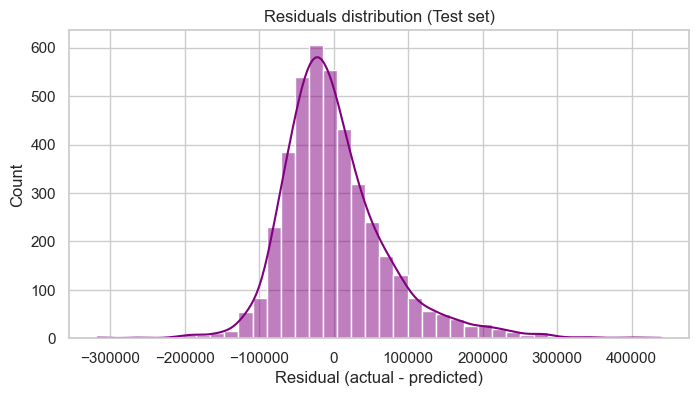

In [47]:
# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual median_house_value')
plt.ylabel('Predicted median_house_value')
plt.title('Predicted vs Actual — Multiple Linear Regression (Test set)')
plt.show()

# Plot 2: Residuals vs Fitted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (predictions)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residuals vs Fitted')
plt.show()

# Plot 3: Residuals distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=40, color='purple')
plt.xlabel('Residual (actual - predicted)')
plt.title('Residuals distribution (Test set)')
plt.show()

### Conclusion:
The multi‑feature linear model explains ~61% of the variance ( R² = 0.6139 ) with RMSE (≈ $71k) and near‑zero average residual (≈$1.1k); this is a large improvement over the single‑feature model but still leaves notable prediction uncertainty and some outliers to investigate.

# ---------------------------------------------------------
# **Model Comparison & Conclusion**

### 1. Which model performs better and why?
The Task 2 (Multi-Feature) model performs substantially better than Task 1 (Single-Feature).
* Task 1 (Single Feature: housing_median_age): poor predictive power — the single feature cannot capture the many determinants of house price (location, income, rooms, population, etc.).
* Task 2 (All Features): uses complementary signals (median_income, rooms/households, location, population, age) so the model explains much more of the variation in price and produces substantially smaller prediction errors.
* Why: housing prices are driven by many factors; adding relevant predictors reduces omitted-variable bias and gives the model the information needed to form better predictions.

### 2. How does adding more features affect error and explained variance?
| Metric | Task 1 (Single Feature) | Task 2 (All Features) | Impact |
| :--- | :--- | :--- | :--- |
| Test MSE | 12,939,617,265.1003 | 5,059,928,371.1654 | MSE decreased by ≈61% — much smaller squared errors overall. |
| Test RMSE | 113,756.0 | 71,133.2 | RMSE decreased by ≈42,622 (improvement). Typical prediction error dropped from (≈$114k) to (≈$71k). |
| Test R² | 0.0126 (≈1.3%) | 0.6139 (≈61.4%) | R² increased by ≈60 percentage points — the multi-feature model explains most of the systematic variance. |

Interpretation: adding features massively improved explanatory power (R²) and reduced typical prediction error (RMSE). The single-feature model performed almost no better than predicting the mean; the multi-feature model captures the major structure in the data.

### 3. Trade-offs between Interpretability and Performance
* Task 1 (High interpretability, low performance)
    * Very easy to visualize and explain: one feature → one slope and intercept.
    * But predictive usefulness is negligible (R²≈0.01, RMSE ≈$114k).
    * Good as a simple baseline and for teaching/intuition, but not adequate for prediction.
* Task 2 (Lower interpretability, much higher performance)
    * Coefficients for many features (and possible multicollinearity) make direct interpretation harder.
    * Performance is far better (R²≈0.61, RMSE ≈$71k), which is usually preferred for predictive tasks.
    * Trade-off: you gain predictive accuracy at the cost of a more complex model; use coefficient tables, standardized effects, or feature‑importance and consider regularization to improve interpretability and stability.


### 4. Final Conclusion
Using multiple, relevant features yields a large improvement in predicting median house value. The multi-feature linear regression explains ~61% of variance and reduces typical prediction error to ≈$71k, compared with a near‑zero explanatory model using only housing_median_age.